In [3]:
import random as rd
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

In [56]:
#Gifts generation
n_gifts = 3
max_tries = 200
verbose = True
#Roulette
total_frames = 45
power = 1.2
slow_start = 33

In [57]:
def initialization():
    family_dict = {
    "Maman":  {"is_Bretonniere": True,  "couple" : [""],      "gifts_to": [], "gifts_received":0},
    "PA":     {"is_Bretonniere": True,  "couple" : ["Lidia"], "gifts_to": [], "gifts_received":0}, 
    "Lidia":  {"is_Bretonniere": False, "couple" : ["PA"],    "gifts_to": [], "gifts_received":0},
    "Claire": {"is_Bretonniere": True,  "couple" : ["Adrien"],"gifts_to": [], "gifts_received":0},
    "Adrien": {"is_Bretonniere": False, "couple" : ["Claire"],"gifts_to": [], "gifts_received":0},
    "Arnaud": {"is_Bretonniere": True,  "couple" : ["AL"],    "gifts_to": [], "gifts_received":0},
    "AL":     {"is_Bretonniere": False, "couple" : ["Arnaud"],"gifts_to": [], "gifts_received":0},
    "Hubert": {"is_Bretonniere": False, "couple" : [""],      "gifts_to": [], "gifts_received":0}
    }
    return family_dict

In [58]:
family_dict=initialization()
n_people = len(family_dict)
max_combinations = math.comb(n_people-1,n_gifts)


In [59]:
def check_bretonniere(test):
    has_bretonniere = any(family_dict[test[i]]['is_Bretonniere'] for i in range(len(test)))
    return has_bretonniere

In [60]:
#test = rd.sample(list(family_dict.keys()),k=n_gifts)

#print(test)
#print(type(test))
#person="AL"
#test=["AL","Adrien","Lidia"]
def validation(test, person):
    valid_list=True
#    check_bretonniere = has_bretonniere(test)
    if family_dict[person]["couple"][0] in test:
        if verbose:
            print("couple")
        valid_list=False
    has_bretonniere=check_bretonniere(test)
    if not has_bretonniere:
        if verbose:
            print("no Bretonniere")
        valid_list = False
    for gifted in test:
            if family_dict[gifted]["gifts_received"] >= 3:
                valid_list = False
#                print("Problem: already", family_dict[gifted]["gifts_received"], "gifts for ", gifted )
        
#optimized:
    #valid_list = not any(family_dict[gifted]["gifts_received"] >= 3 for gifted in test)
    return valid_list

#validation(test,person)

In [61]:
def display_gifts(family_dict):
    for p in list(family_dict.keys()):
        print(p,"offers to",family_dict[p]["gifts_to"], family_dict[k]["gifts_received"],"gifts received")               

In [62]:
for j in range(1,max_tries+1):
    print("try ",j)
    family_dict=initialization()
    for i in range(0,n_people):
        person=list(family_dict.keys())[i]
        print("Generating presents for ",person,"( try #",j,")",i)
        valid_list = False
        max=1
        tested_list=[]
        while not valid_list and max <= math.comb(n_people-1,n_gifts):
            reduced_list = [ name  for name in list(family_dict.keys()) if name != person]
            list_test = sorted(rd.sample(reduced_list,k=n_gifts))
            if not list_test in tested_list:
                tested_list.append(list_test)
                if verbose:
                    print("Testing",list_test, "(",max,"/",max_combinations,")")
                valid_list = validation(list_test,person)
                max+=1
            if max == max_combinations:
                if verbose:
                    print("all combinations tested")
                    if family_dict[gifted]["gifts_received"] != 3:
                        valid_list = False
                break 
            
        if valid_list:
            family_dict[person]["gifts_to"]=list_test
            for gifted in list(family_dict[person]["gifts_to"]):
                family_dict[gifted]["gifts_received"]+=1
                print("adding 1 present to",gifted,". Now has ",family_dict[gifted]["gifts_received"],"presents.")
            if verbose:
                for k in list(family_dict.keys()):
                    print(k)
                    print(family_dict[k]["gifts_to"],family_dict[k]["gifts_received"])
            print("----")
            if i==n_people-1:
                print("Found! (after ",j,"tries)")
                j=max_tries
                break
    
        else:
            print("No valid list found after ",j,"tries")
            display_gifts(family_dict)
            break
            
    if valid_list and i==n_people -1 :
        break
display_gifts(family_dict)     

try  1
Generating presents for  Maman ( try # 1 ) 0
Testing ['Adrien', 'Claire', 'Lidia'] ( 1 / 35 )
adding 1 present to Adrien . Now has  1 presents.
adding 1 present to Claire . Now has  1 presents.
adding 1 present to Lidia . Now has  1 presents.
Maman
['Adrien', 'Claire', 'Lidia'] 0
PA
[] 0
Lidia
[] 1
Claire
[] 1
Adrien
[] 1
Arnaud
[] 0
AL
[] 0
Hubert
[] 0
----
Generating presents for  PA ( try # 1 ) 1
Testing ['Adrien', 'Hubert', 'Lidia'] ( 1 / 35 )
couple
no Bretonniere
Testing ['Arnaud', 'Claire', 'Hubert'] ( 2 / 35 )
adding 1 present to Arnaud . Now has  1 presents.
adding 1 present to Claire . Now has  2 presents.
adding 1 present to Hubert . Now has  1 presents.
Maman
['Adrien', 'Claire', 'Lidia'] 0
PA
['Arnaud', 'Claire', 'Hubert'] 0
Lidia
[] 1
Claire
[] 2
Adrien
[] 1
Arnaud
[] 1
AL
[] 0
Hubert
[] 1
----
Generating presents for  Lidia ( try # 1 ) 2
Testing ['Arnaud', 'Claire', 'Hubert'] ( 1 / 35 )
adding 1 present to Arnaud . Now has  2 presents.
adding 1 present to Claire .

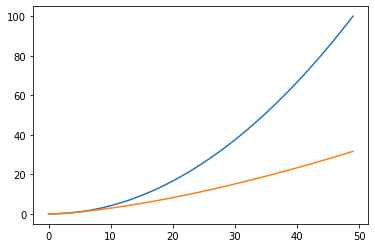

In [63]:
x = np.linspace(0, 10)
plt.plot(x**2)
plt.plot(x**(1.5))


In [64]:
imgs = []
for i in range(8):
    imgs.append(np.asarray(Image.open(f'{i}.png')))

In [65]:
list_imgs_0 = []
list_imgs_1 = []
list_imgs_2 = []

for i in range(total_frames):
    if i < slow_start:
        list_imgs_0.append(i%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_0.append(i%8)


start_slow_1 = int(3*len(list_imgs_0) / 4)

for i in range(start_slow_1):
    list_imgs_1.append((i+1)%8)
    list_imgs_2.append((i+3)%8)
    list_imgs_0.append(list_imgs_0[-1])


for i in range(total_frames):
    if i < slow_start:
        list_imgs_1.append((i+1)%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_1.append((i+1)%8)

start_slow_2 = int(1*len(list_imgs_1) / 2)

for i in range(start_slow_2):
    list_imgs_2.append((i+3)%8)
    list_imgs_1.append(list_imgs_1[-1])
    list_imgs_0.append(list_imgs_0[-1])

for i in range(total_frames):
    if i < slow_start:
        list_imgs_2.append((i+3)%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_2.append((i+3)%8)

total_frames = len(list_imgs_2)

In [66]:
total_frames


327

/usr/lib/python3/dist-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


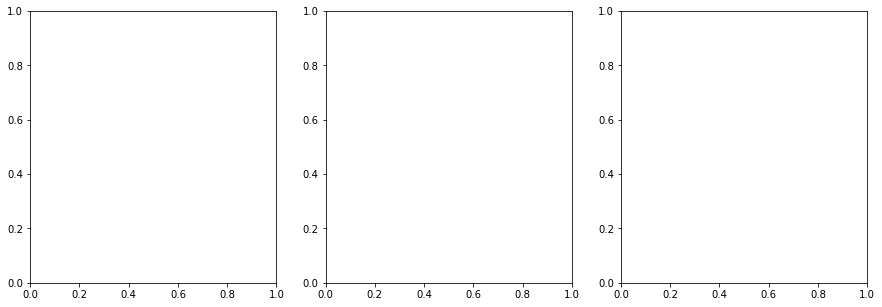

In [67]:
# Create a figure and axis
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Function to initialize the plot
def init():
    ax[0].clear()

    return []

# Function to update the plot for each frame
def update(frame):
#     print(frame+1%8)
    ax[0].clear()
    # Your plotting code here
    ax[0].imshow(imgs[list_imgs_0[frame]])
    
    ax[1].clear()
    # Your plotting code here
    ax[1].imshow(imgs[list_imgs_1[frame]])
    
    ax[2].clear()
    # Your plotting code here
    ax[2].imshow(imgs[list_imgs_2[frame]])
    for i in range(3):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

# Create the animation
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, repeat=False, interval=50)


In [68]:
ani.save('test_roulette.mp4')#, dpi=5)

ValueError: unknown file extension: .mp4